In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# 邏輯斯回歸

* 是分類模型

* 由於是二元分類，如果判斷成A類的機率越小，B類的機率越大

* 當Z=0時判斷成+1類(A類)的機率為0.5，因此只要 z >0 判斷成 A類的機率就會>0.5 ，判斷成+1類(A類)。

* 如果z≤0 判斷成A類的機率就≤0.5 ，就判斷成-1類(B類)


In [2]:
iris = load_iris()
feature = pd.DataFrame(iris['data'], columns = iris['feature_names'])
target = pd.DataFrame(iris['target'],columns = ['class'])
data = pd.concat([feature, target], axis=1)
df = data[data['class'] !=2] #只考慮類別為０和１的資料

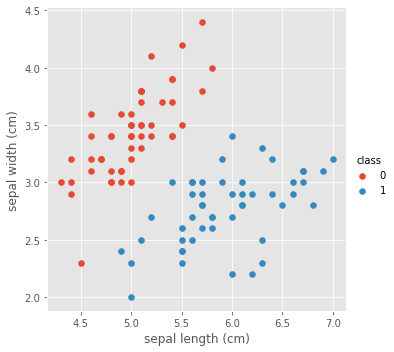

In [3]:
plt.style.use('ggplot')
g = sns.FacetGrid(df, hue='class',height=5)
g.map(plt.scatter,"sepal length (cm)","sepal width (cm)")
g.add_legend()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.iloc[:,:2].values #0,1
y = df.iloc[:,4].values #class
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [6]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [7]:
lr = LogisticRegression(C=100.0,random_state=1) #c=1/lamda，值越小，正則化越強
lr.fit(X_std,y)
print(lr.coef_)
print(lr.intercept_ )

[[ 9.97519721 -6.71009506]]
[1.81731713]


In [8]:
def plot_decision_regions(X, y, classifer, test_idx=None, resolution=0.02):
    
    markers = ('s','x','o','^','v') #圖形
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min , x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    xx1,xx2 = np.meshgrid(np.arange(x1_min , x1_max, resolution), #背景的網格
                         np.arange(x2_min, x2_max, resolution))
    Z = classifer.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2 ,Z,alpha=0.3, cmap=cmap) #繪製等高線圖(z為深度,alpha為透明度，介於0~1) 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): #enumerate:同時取得index及value
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')    
    if test_idx:       #類別0的散點圖
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

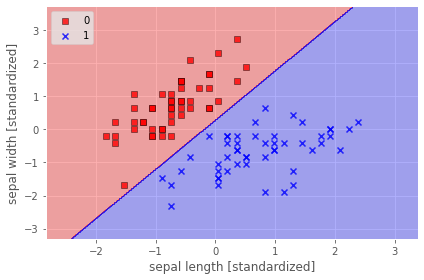

In [9]:
plot_decision_regions(X_std, y, classifer=lr)
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()